In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import xlrd

In [2]:
# 從Excel中讀取資料存入陣列
data = []
data =[[0,70.8091,106.8712,172.244,139.9527,273.3987,97.9468,145.2595,225.1212,205.0963,235.5262,183.1068,150.5021,194.2316,234.8294,130.7442,173.3115,186.9334,132.3287,182.4681,61.3397,202.6845,311.7313,186.3244,96.3339,136.4158,186.9055,130.0882,204.1784,148.8279,106.4587,195.2101,164.0676,148.9901,158.9465,139.2477,182.3218,151.6186,195.829,156.9278,86.84969,164.3058,100.9,268.4509,176.1858,232.9752,180.4566
],[70.8091,0,106.6643,116.0579,137.9059,97.5902,183.556,157.3213,214.425,186.3959,236.7715,156.3145,267.0662,228.4368,199.0646,118.5168,194.0958,183.7293,120.81,158.6619,92.1047,178.5405,150.4878,133.2567,96.8364,138.4813,162.9985,93.4252,147.1585,137.8539,158.062,191.1205,154.1233,148.6535,179.9827,149.4016,191.6466,134.2091,180.9338,155.9267,93.76689,134.5966,74.9962,247.6479,160.3656,208.3462,170.2397
],[106.8712,106.6643,0,75.9971,98.0545,69.4411,84.6101,141.573,195.3804,203.3823,200.7326,103.4588,67.3436,147.6646,149.2168,53.6844,64.6438,117.5501,98.01639,60.2041,68.6358,91.528,96.8402,66.82939,52.111,172.09749,98.17919,68.4851,82.6064,71.62439,51.59629,211.6366,86.688,149.2664,170.908,149.7055,188.1083,148.3364,163.2649,134.7567,87.79009,125.5684,204.3766,231.3502,158.0295,204.83,91.8277
],[172.244,116.0579,75.9971,0,48.938,74.39159,72.7403,128.9682,128.2825,191.0888,174.6916,113.3231,118.8436,89.6517,122.4335,62.3797,63.223,113.861,51.935,152.0379,86.4722,44.9672,60.1107,60.4374,82.1338,164.8205,69.6832,90.7998,78.97319,77.98759,85.9155,200.4852,114.6469,128.4737,142.03299,153.9816,153.6219,76.3728,124.2227,119.2297,159.1157,134.2768,123.7941,220.1181,128.0631,148.8409,95.5294
],[139.9527,137.9059,98.0545,48.938,0,91.0552,81.9546,134.4468,119.3626,185.9933,156.4291,51.2231,43.8406,75.1654,63.8411,54.3885,105.804,48.4313,81.8026,55.7271,125.02769,63.0114,73.6671,50.4233,104.1667,176.2155,91.26899,50.9456,153.4943,65.9148,96.4532,201.6307,108.1371,135.0405,153.07199,168.5148,156.9829,87.03809,122.6424,146.5577,183.8179,154.8148,145.3362,210.1054,188.4539,155.2467,78.3954
],[273.3987,97.5902,69.4411,74.39159,91.0552,0,109.2761,115.2451,112.9845,188.8447,180.4319,92.4397,91.3958,95.5957,122.1858,106.6351,116.7896,55.9939,63.272,148.6479,139.3873,63.781,98.38069,82.0261,76.3849,142.2379,74.694,106.3249,108.6376,86.4819,93.278,193.36129,135.2295,121.9146,150.5725,141.5449,150.5165,72.6685,117.3049,129.5443,140.6992,134.3273,106.4764,223.3466,127.9084,150.2387,100.7269
],[97.9468,183.556,84.6101,72.7403,81.9546,109.2761,0,129.4574,167.2646,185.6201,188.9255,240.3474,181.2212,254.8087,192.1383,78.8833,142.9974,198.3431,83.5301,197.4542,110.4338,197.9864,116.2225,130.3151,95.1102,129.4733,149.0255,90.4742,102.2815,101.2366,88.3748,184.7971,121.6609,100.4166,142.2934,127.25,148.1412,101.0549,174.0094,132.9753,132.2939,116.2226,89.7146,221.5113,150.1247,190.0619,114.6443
],[145.2595,157.3213,141.573,128.9682,134.4468,115.2451,129.4574,0,167.1039,192.74569,162.8727,130.4294,201.7243,182.8474,141.526,164.5826,179.084,182.9072,115.8832,165.6625,170.8477,135.3785,144.0062,148.0211,144.1781,127.80269,123.6576,152.5423,142.9874,150.5092,136.1598,149.1066,186.8747,108.0973,134.1921,144.8341,186.8393,143.945,183.0305,190.50699,163.1619,146.0874,112.6318,170.9284,155.9457,188.744,153.4099
],[225.1212,214.425,195.3804,128.2825,119.3626,112.9845,167.2646,167.1039,0,153.5433,101.898,133.2133,112.5944,122.0266,126.2368,125.0264,108.1933,142.6871,130.757,133.0709,167.3895,144.7756,94.9525,103.2925,191.011,191.0403,102.2966,192.6986,90.3174,135.5111,157.3526,144.172,124.0704,120.665,189.2015,152.5813,137.5368,131.9944,231.8466,192.5825,209.5928,143.027,169.1189,113.6476,241.214,188.7529,113.6556
],[205.0963,186.3959,203.3823,191.0888,185.9933,188.8447,185.6201,192.74569,153.5433,0,75.23319,155.7595,193.81499,171.0544,178.3257,236.8585,196.8255,183.9544,187.8493,218.5982,220.4814,188.63669,217.9473,212.0519,202.6051,100.94309,176.9685,210.9095,198.784,243.508,220.935,79.8851,153.1087,134.7657,96.9754,95.3267,90.9726,171.1229,129.8392,132.6957,124.52,111.58489,152.6523,121.7975,146.3909,84.23989,209.6092
],[235.5262,236.7715,200.7326,174.6916,156.4291,180.4319,188.9255,162.8727,101.898,75.23319,0,131.2355,171.8598,109.0911,124.85,222.8771,171.4618,136.1238,204.4716,187.1232,238.0933,163.1818,162.3427,183.2861,203.4084,125.1373,138.4769,209.5152,166.12569,217.105,197.8273,63.18089,141.9276,126.5458,102.18149,91.9961,215.6989,153.4024,119.286,110.11249,226.5362,132.98299,180.392,66.3411,121.6091,97.7542,156.6915
],[183.1068,156.3145,103.4588,113.3231,51.2231,92.4397,240.3474,130.4294,133.2133,155.7595,131.2355,0,128.2289,70.842,114.5697,96.3847,78.2204,75.52219,72.2439,90.3053,260.9808,74.8187,119.2861,65.316299,121.6768,142.2379,74.694,106.32,108.637,86.4819,93.27,193.36,135.22,121.91,150.5725,141.54,150.51,72.668,117.3,129.5,140.6,134.3,106.47,223.34,127.9,150.23,91.72259
],[150.5021,267.0662,67.3436,118.8436,43.8406,91.3958,181.2212,201.7243,112.5944,193.81499,171.8598,128.2289,0,127.78,185,109.17,130.33,219.41,72.0825,52.234,164.23,120.982,209.673,84.03,177.4,172.404,140.14,92.45,164.5547,45.296,85.7492,207.283,95.65,134.27,147.1,172.351,188.79,80.842,187.03,131.38,163.32,147.82,134.4,218.44,199.843,199.37,67.941
],[194.2316,228.4368,147.6646,89.6517,75.1654,95.5957,254.8087,182.8474,122.0266,171.0544,109.0911,70.842,127.78,0,70.796,107.944,107.51,75.33,112.52,105.256,283.93,81.31,102.17,86.63,165.1,183.96,86.957,166.89,97.47,125.9,156.64,174.5,152.22,131.8,193.9,164.85,181.5,143.24,145.58,156.78,219.06,147.6,179.41,165.6,209.3,141.03,100.59
],[234.8294,199.0646,149.2168,122.4335,63.8411,122.1858,192.1383,141.526,126.2368,178.3257,124.85,114.5697,185,70.796,0,127.56,58.975,129.2,94.3,189.6483,289.2,54.4,41.19,77.72,177.2,203.08,65.78,147.4,115.52,104.73,153.03,184.28,144.545,142.17,171.1,193.4,155.92,150.14,150.2,140.4,225.31,162.07,188.73,186.16,189.25,138.2,88.44
],[130.7442,118.5168,53.6844,62.3797,54.3885,106.6351,78.8833,164.5826,125.0264,236.8585,222.8771,96.3847,109.17,107.944,127.56,0,63.84,46.8,89.27,122.08,83.8,62.022,67.6,32.803,68.46,190.29,78.75,67.95,79.2,39.68,59.48,240.27,132.85,164.97,173.77,184.67,200.86,128.76,120.15,148,141.01,163.41,129.47,267.51,122.47,161.92,77.369
],[173.3115,194.0958,64.6438,63.223,105.804,116.7896,142.9974,179.084,108.1933,196.8255,171.4618,78.2204,130.33,107.51,58.975,63.84,0,34.74,76.2,185.226,180.76,76.289,50.86,79.99,90.92,168.37,65.83,80.44,61,60.81,90.688,215.72,98.07,139.907,142.93,166.995,150.21,151.53,106.69,117.78,155.96,143.32,125.95,223.84,125.719,164.03,123.98
],[186.9334,183.7293,117.5501,113.861,48.4313,55.9939,198.3431,182.9072,142.6871,183.9544,136.1238,75.52219,219.41,75.33,129.2,46.8,34.74,0,80.31,133.45,285.33,40.2182,88.439,60.87,145.11,186.68,83.102,124.12,78.827,89.503,149.848,190.28,106.3,124.45,139.2075,182.24,160.34,107.9,114.27,113.59,197.76,144.68,164.16,194.44,184.683,129.45,74.59
],[132.3287,120.81,98.01639,51.935,81.8026,63.272,83.5301,115.8832,130.757,187.8493,204.4716,72.2439,72.0825,112.52,94.3,89.27,76.2,80.31,0,82.18,94.87,79.74,92.21,78.45,95.49,178.24,71.65,125.44,100.01,141.84,105.6,202.07,149.83,122.57,139.99,159.44,192.62,97.68,129.54,114.69,143.52,106.14,131.56,202.92,133.91,169.42,100.91
],[182.4681,158.6619,60.2041,152.0379,55.7271,148.6479,197.4542,165.6625,133.0709,218.5982,187.1232,90.3053,52.234,105.256,189.6483,122.08,185.226,133.45,82.18,0,197.13,92.45,194.1,129.99,94.77,198.135,193.39,127.82,188.38,35.186,79.647,233.19,111.135,156.12,151.06,199.771,170.5,101.61,157.7,170,159.102,173.17,145.94,241.51,235.687,181.9,59.42
],[61.3397,92.1047,68.6358,86.4722,125.02769,139.3873,110.4338,170.8477,167.3895,220.4814,238.0933,260.9808,164.23,283.93,289.2,83.8,180.76,285.33,94.87,197.13,0,218.26,201.571,194.45,55.4,153.28,184.59,61.194,179.47,74.501,83.8502,218.46,160.01,144.24,148.27,165.062,189.852,120.515,175.635,178.53,90.052,152.8,97.61,262.4,183.55,233.81,183.23
],[202.6845,178.5405,91.528,44.9672,63.0114,63.781,197.9864,135.3785,144.7756,188.63669,163.1818,74.8187,120.982,81.31,54.4,62.022,76.289,40.2182,79.74,92.45,218.26,0,118.49,52.44,126.51,177.83,107.22,108.69,128.62,63.1938,106.971,204.63,104.5791,128.9,142.742,173.663,154.636,99.91,118.41,111.29,179.07,148.353,129.21,215.694,189.13,152.72,88.66
],[311.7313,150.4878,96.8402,60.1107,73.6671,98.38069,116.2225,144.0062,94.9525,217.9473,162.3427,119.2861,209.673,102.17,41.19,67.6,50.86,88.439,92.21,194.1,201.571,118.49,0,29.53,113.41,203.9,81.006,125.56,59.98,72.101,86.69,219.51,90.733,148.3879,139.0723,207.44,148.6652,148.301,146.41,107.662,206.074,158.245,165.726,218.16,164.27,155.91,129.63
],[186.3244,133.2567,66.82939,60.4374,50.4233,82.0261,130.3151,148.0211,103.2925,212.0519,183.2861,65.316299,84.03,86.63,77.72,32.803,79.99,60.87,78.45,129.99,194.45,52.44,29.53,0,83.5715,190.92,72.369,77.4647,75.66,49.1278,65.9172,229.23,103.69,151.87,143.369,191.98,176.51,107.182,104.347,116.28,165.85,157.83,143.422,239.92,184.5,139.56,65.24
],[96.3339,96.8364,52.111,82.1338,104.1667,76.3849,95.1102,144.1781,191.011,202.6051,203.4084,121.6768,177.4,165.1,177.2,68.46,90.92,145.11,95.49,94.77,55.4,126.51,113.41,83.5715,0,143.49,114.001,57.014,90.039,89.059,108.765,203.82,134.48,111.79,170.23,147.43,168.476,112.98,154.64,118.84,86.33,131.24,90.53,236.61,128.79,187.19,125.33
],[136.4158,138.4813,172.09749,164.8205,176.2155,142.2379,129.4733,127.80269,191.0403,100.94309,125.1373,142.2379,172.404,183.96,203.08,190.29,168.37,186.68,178.24,198.135,153.28,177.83,203.9,190.92,143.49,0,167.17,176.454,169.04,204.3,185.49,121.437,153.71,122.26,109.594,60.99,95.67,165.5,145.39,130.33,138.15,106.7,99.76,180.958,135.74,135.19,198.43
],[186.9055,162.9985,98.17919,69.6832,91.26899,74.694,149.0255,123.6576,102.2966,176.9685,138.4769,74.694,140.14,86.957,65.78,78.75,65.83,83.102,71.65,193.39,184.59,107.22,81.006,72.369,114.001,167.17,0,123.676,88.66,86.84,116.9,182.08,114.95,117.47,144.17,177.99,152.564,129.89,129.49,142.43,178.367,131.07,137.94,194.29,143.32,137.153,166.45
],[130.0882,93.4252,68.4851,90.7998,50.9456,106.3249,90.4742,152.5423,192.6986,210.9095,209.5152,106.32,92.45,166.89,147.4,67.95,80.44,124.12,125.44,127.82,61.194,108.69,125.56,77.4647,57.014,176.454,123.676,0,81.44,57.8,65.94,227.306,120,158.525,140.1,181,175.686,112.28,168.36,130.96,121.23,160.26,129.11,247.9,155.469,215.81,121.8
],[204.1784,147.1585,82.6064,78.97319,153.4943,108.6376,102.2815,142.9874,90.3174,198.784,166.12569,108.637,164.5547,97.47,115.52,79.2,61,78.827,100.01,188.38,179.47,128.62,59.98,75.66,90.039,169.04,88.66,81.44,0,44.723,83.143,216.313,72.715,138.74,135.05,173.118,147.9,120.471,141.62,129.68,151.54,143.49,126.705,227.68,148.81,108.569,147.331
],[148.8279,137.8539,71.62439,77.98759,65.9148,86.4819,101.2366,150.5092,135.5111,243.508,217.105,86.4819,45.296,125.9,104.73,39.68,60.81,89.503,141.84,35.186,74.501,63.1938,72.101,49.1278,89.059,204.3,86.84,57.8,44.723,0,48.7,256.62,115.14,176.48,164.624,202,196.71,105.775,139.71,165.93,159.93,177.9,151.196,268.34,131.99,186.59,118.641
],[106.4587,158.062,51.59629,85.9155,96.4532,93.278,88.3748,136.1598,157.3526,220.935,197.8273,93.27,85.7492,156.64,153.03,59.48,90.688,149.848,105.6,79.647,83.8502,106.971,86.69,65.9172,108.765,185.49,116.9,65.94,83.143,48.7,0,234.4,99.73,154.5,169.04,188.23,157.45,94.8,177.889,133.999,128,152.29,133.54,249.9,140.14,191.9,116.91
],[195.2101,191.1205,211.6366,200.4852,201.6307,193.36129,184.7971,149.1066,144.172,79.8851,63.18089,193.36,207.283,174.5,184.28,240.27,215.72,190.28,202.07,233.19,218.46,204.63,219.51,229.23,203.82,121.437,182.08,227.306,216.313,256.62,234.4,0,152.98,133.43,99.531,127.284,60.97,179.7,138.11,137.68,191.19,127.95,165.21,84.49,149.28,96.26,205.607
],[164.0676,154.1233,86.688,114.6469,108.1371,135.2295,121.6609,186.8747,124.0704,153.1087,141.9276,135.22,95.65,152.22,144.545,132.85,98.07,106.3,149.83,111.135,160.01,104.5791,90.733,103.69,134.48,153.71,114.95,120,72.715,115.14,99.73,152.98,0,147.61,72.606,138.107,104.23,129.762,79.043,70.616,105.32,129.83,142.52,171.524,69.583,135.33,90.72
],[148.9901,148.6535,149.2664,128.4737,135.0405,121.9146,100.4166,108.0973,120.665,134.7657,126.5458,121.91,134.27,131.8,142.17,164.97,139.907,124.45,122.57,156.12,144.24,128.9,148.3879,151.87,111.79,122.26,117.47,158.525,138.74,176.48,154.5,133.43,147.61,0,121.71,147.04,170.19,170.19,132.93,124.36,151.43,71.85,116.575,143.498,144.06,129.5,143.788
],[158.9465,179.9827,170.908,142.03299,153.07199,150.5725,142.2934,134.1921,189.2015,96.9754,102.18149,150.5725,147.1,193.9,171.1,173.77,142.93,139.2075,139.99,151.06,148.27,142.742,139.0723,143.369,170.23,109.594,144.17,140.1,135.05,164.624,169.04,99.531,72.606,121.71,0,97.33,202.21,109.363,73.6,63.976,142.94,138.067,133.87,134.116,67.5765,85.628,131.68
],[139.2477,149.4016,149.7055,153.9816,168.5148,141.5449,127.25,144.8341,152.5813,95.3267,91.9961,141.54,172.351,164.85,193.4,184.67,166.995,182.24,159.44,199.771,165.062,173.663,207.44,191.98,147.43,60.99,177.99,181,173.118,202,188.23,127.284,138.107,147.04,97.33,0,95.381,156.25,146.44,133.26,108.734,125.27,136.409,149.49,149.657,92.097,202.08
],[182.3218,191.6466,188.1083,153.6219,156.9829,150.5165,148.1412,186.8393,137.5368,90.9726,215.6989,150.51,188.79,181.5,155.92,200.86,150.21,160.34,192.62,170.5,189.852,154.636,148.6652,176.51,168.476,95.67,152.564,175.686,147.9,196.71,157.45,60.97,104.23,170.19,202.21,95.381,0,158.8,84.0689,120.041,158.48,107.035,131.44,106.11,68.11,72.421,126.72
],[151.6186,134.2091,148.3364,76.3728,87.03809,72.6685,101.0549,143.945,131.9944,171.1229,153.4024,72.668,80.842,143.24,150.14,128.76,151.53,107.9,97.68,101.61,120.515,99.91,148.301,107.182,112.98,165.5,129.89,112.28,120.471,105.775,94.8,179.7,129.762,170.19,109.363,156.25,158.8,0,127.774,122.29,112.81,101.22,94.17,195.63,159.56,170.049,120.01
],[195.829,180.9338,163.2649,124.2227,122.6424,117.3049,174.0094,183.0305,231.8466,129.8392,119.286,117.3,187.03,145.58,150.2,120.15,106.69,114.27,129.54,157.7,175.635,118.41,146.41,104.347,154.64,145.39,129.49,168.36,141.62,139.71,177.889,138.11,79.043,132.93,73.6,146.44,84.0689,127.774,0,73.85,185.8,138.54,161.349,155.3039,172.956,134.81,111.18
],[156.9278,155.9267,134.7567,119.2297,146.5577,129.5443,132.9753,190.50699,192.5825,132.6957,110.11249,129.5,131.38,156.78,140.4,148,117.78,113.59,114.69,170,178.53,111.29,107.662,116.28,118.84,130.33,142.43,130.96,129.68,165.93,133.999,137.68,70.616,124.36,63.976,133.26,120.041,122.29,73.85,0,149.762,143.04,142.189,153.46,82.756,94.33,166.43]
,[86.84969,93.76689,87.79009,159.1157,183.8179,140.6992,132.2939,163.1619,209.5928,124.52,226.5362,140.6,163.32,219.06,225.31,141.01,155.96,197.76,143.52,159.102,90.052,179.07,206.074,165.85,86.33,138.15,178.367,121.23,151.54,159.93,128,191.19,105.32,151.43,142.94,108.734,158.48,112.81,185.8,149.762,0,145.268,89.56,197.71,172.124,200.57,181.07]
,[164.3058,134.5966,125.5684,134.2768,154.8148,134.3273,116.2226,146.0874,143.027,111.58489,132.98299,134.3,147.82,147.6,162.07,163.41,143.32,144.68,106.14,173.17,152.8,148.353,158.245,157.83,131.24,106.7,131.07,160.26,143.49,177.9,152.29,127.95,129.83,71.85,138.067,125.27,107.035,101.22,138.54,143.04,145.268,0,114.788,175.599,150.197,128.066,149.6]
,[100.9,74.9962,204.3766,123.7941,145.3362,106.4764,89.7146,112.6318,169.1189,152.6523,180.392,106.47,134.4,179.41,188.73,129.47,125.95,164.16,131.56,145.94,97.61,129.21,165.726,143.422,90.53,99.76,137.94,129.11,126.705,151.196,133.54,165.21,142.52,116.575,133.87,136.409,131.44,94.17,161.349,142.189,89.56,114.788,0,195.56,136.42,198.77,150.504]
,[268.4509,247.6479,231.3502,220.1181,210.1054,223.3466,221.5113,170.9284,113.6476,121.7975,66.3411,223.34,218.44,165.6,186.16,267.51,223.84,194.44,202.92,241.51,262.4,215.694,218.16,239.92,236.61,180.958,194.29,247.9,227.68,268.34,249.9,84.49,171.524,143.498,134.116,149.49,106.11,195.63,155.3039,153.46,197.71,175.599,195.56,0,160.205,96.93,206.091]
,[176.1858,160.3656,158.0295,128.0631,188.4539,127.9084,150.1247,155.9457,241.214,146.3909,121.6091,127.9,199.843,209.3,189.25,122.47,125.719,184.683,133.91,235.687,183.55,189.13,164.27,184.5,128.79,135.74,143.32,155.469,148.81,131.99,140.14,149.28,69.583,144.06,67.5765,149.657,68.11,159.56,172.956,82.756,172.124,150.197,136.42,160.205,0,140.207,238.143]
,[232.9752,208.3462,204.83,148.8409,155.2467,150.2387,190.0619,188.744,188.7529,84.23989,97.7542,150.23,199.37,141.03,138.2,161.92,164.03,129.45,169.42,181.9,233.81,152.72,155.91,139.56,187.19,135.19,137.153,215.81,108.569,186.59,191.9,96.26,135.33,129.5,85.628,92.097,72.421,170.049,134.81,94.33,200.57,128.066,198.77,96.93,140.207,0,155.779]
,[180.4566,170.2397,91.8277,95.5294,78.3954,100.7269,114.6443,153.4099,113.6556,209.6092,156.6915,91.72259,67.941,100.59,88.44,77.369,123.98,74.59,100.91,59.42,183.23,88.66,129.63,65.24,125.33,198.43,166.45,121.8,147.331,118.641,116.91,205.607,90.72,143.788,131.68,202.08,126.72,120.01,111.18,166.43,181.07,149.6,150.504,206.091,238.143,155.779,0]]



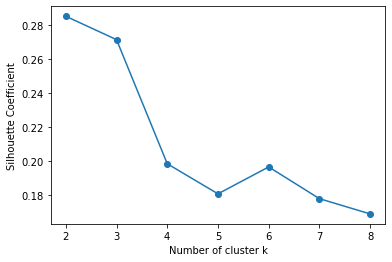

In [3]:
featureList = ['1101台泥','1102亞泥','1216統一','1301台塑','1303南亞','1326台化','1402遠東新','1476儒鴻','2002中鋼','2105正新','2207和泰車','2801彰銀','2880華南金','2881富邦金','2882國泰金','2883開發金','2884玉山金','2885元大金','2886兆豐金','2887台新金','2890永豐金','2891中信金','2892第一金','5880合庫金','2912統一超','9904寶成','6505台塑化','2303聯電','2330台積電','2408南亞科','2454聯發科','2301光寶科','2324仁寶','2357華碩','2382廣達','2395研華','4938和碩','2409友達','3008大立光','3481群創','2412中華電','3045台灣大','4904遠傳','2308台達電','2317鴻海','2354鴻準','2474可成']

mdl = pd.DataFrame.from_records(data, columns=featureList)


Scores = []  # 存放輪廓係數
for k in range(2, 9):
    estimator = KMeans(n_clusters=k)  # 構造聚類器
    estimator.fit(np.array(mdl[['1101台泥','1102亞泥','1216統一','1301台塑','1303南亞','1326台化','1402遠東新','1476儒鴻','2002中鋼','2105正新','2207和泰車','2801彰銀','2880華南金','2881富邦金','2882國泰金','2883開發金','2884玉山金','2885元大金','2886兆豐金','2887台新金','2890永豐金','2891中信金','2892第一金','5880合庫金','2912統一超','9904寶成','6505台塑化','2303聯電','2330台積電','2408南亞科','2454聯發科','2301光寶科','2324仁寶','2357華碩','2382廣達','2395研華','4938和碩','2409友達','3008大立光','3481群創','2412中華電','3045台灣大','4904遠傳','2308台達電','2317鴻海','2354鴻準','2474可成']
]))
    Scores.append(silhouette_score(np.array(mdl[['1101台泥','1102亞泥','1216統一','1301台塑','1303南亞','1326台化','1402遠東新','1476儒鴻','2002中鋼','2105正新','2207和泰車','2801彰銀','2880華南金','2881富邦金','2882國泰金','2883開發金','2884玉山金','2885元大金','2886兆豐金','2887台新金','2890永豐金','2891中信金','2892第一金','5880合庫金','2912統一超','9904寶成','6505台塑化','2303聯電','2330台積電','2408南亞科','2454聯發科','2301光寶科','2324仁寶','2357華碩','2382廣達','2395研華','4938和碩','2409友達','3008大立光','3481群創','2412中華電','3045台灣大','4904遠傳','2308台達電','2317鴻海','2354鴻準','2474可成']
]), estimator.labels_))
X = range(2, 9)
plt.xlabel('Number of cluster k')
plt.ylabel('Silhouette Coefficient')
plt.plot(X, Scores, 'o-')
plt.show()